# Decision Tree Solutions


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
!pip install -q graphviz
import graphviz
import matplotlib.pyplot as plt

Load Pima diabetes dataset and split data, with test size 20%

In [2]:
url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

# Dropping NaN rows
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)
data.head()

# Splitting data
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [3]:
bad_model = DecisionTreeClassifier(criterion="entropy", random_state = 0,
                               max_depth=50, min_samples_leaf=2)
bad_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Print accuracy of training and validation data.

In [4]:
# Printing accuracy of testing & training data
y_train_bad_pred=bad_model.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_bad_pred)*100)
y_val_bad_pred=bad_model.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_bad_pred)*100)

Training Accuracy is  96.8
Validation Accuracy is  73.01587301587301


Make a model with a low max-depth and higher minimum sample leafs. Feel free to play around with these parameters.

In [5]:
tree_model = DecisionTreeClassifier(criterion="entropy", random_state = 0,
                               max_depth=5, min_samples_leaf=5)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Print accuracy of training and validation data.

In [6]:
# Printing accuracy of testing & training data
y_train_tree_pred=tree_model.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_tree_pred)*100)
y_val_tree_pred=tree_model.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_tree_pred)*100)

Training Accuracy is  84.8
Validation Accuracy is  77.77777777777779


Explain the accuracy results below.

ANSWER: 

The first model overfits, since it's max depth is really big and minimum sample leafs really low.

Plot the ROC curve and print the AUC of the second model.

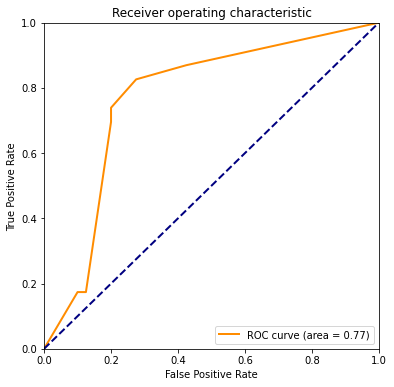

In [7]:
y_val_tree_prob = tree_model.predict_proba(X_val,[0,1])
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_tree_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Use graphviz to visualize your 2nd tree.

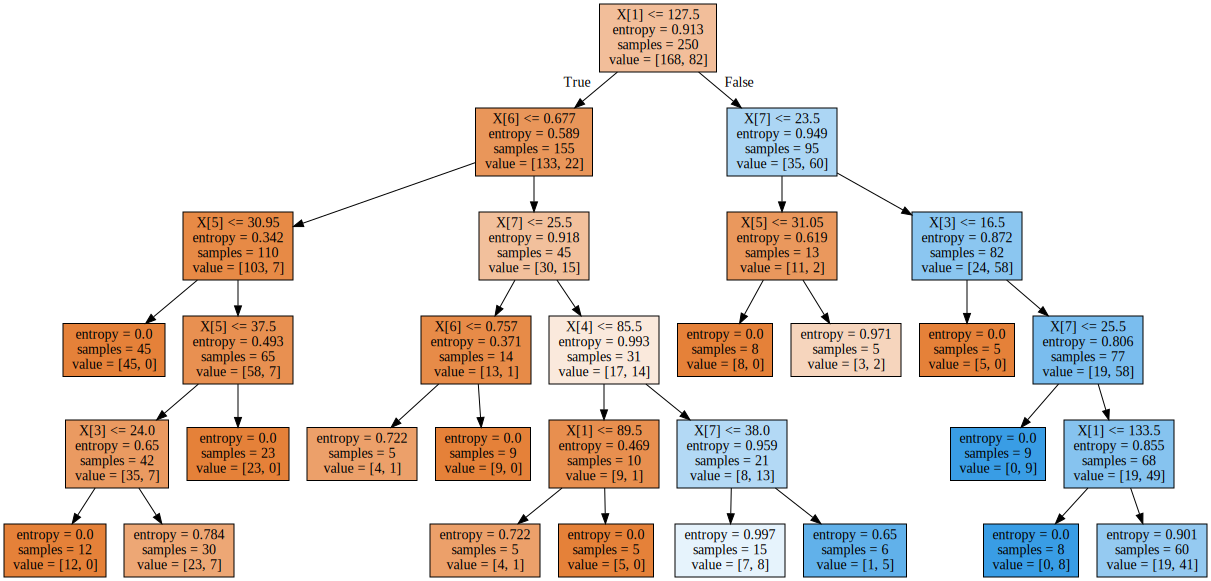

In [8]:
dot_data = tree.export_graphviz(tree_model, out_file=None, filled=True)

graph = graphviz.Source(dot_data)  
graph

Copy and paste the above graph into [webgraphviz.com](http://webgraphviz.com/) to see a picture representation of the graph. Use the graph to answer the questions below:

Question 1: If you add up the samples from the leaf nodes, how many samples are there?

ANSWER:

The number of samples in X or y train

Question 2: What do you think X[n] represents in the nodes from the graph?

ANSWER:

The feature number

Question 3: What is the root feature? Does it make sense as the root feature?

ANSWER:

For me it is plas (from pandas this is the one with the highest correlation with class)

Question 4: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

ANSWER:

It should overfit, so the test accruacy should go down and the training accuracy should increase.

Create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data

In [9]:
decision_model = DecisionTreeClassifier(criterion = "gini", random_state = None,
                               max_depth=500, min_samples_leaf=1)  # minimum sample leafs is the minimum sample amount the leaf can have
decision_model.fit(X_train, y_train)

y_pred = decision_model.predict(X_train)
print("Train accuracy is ", accuracy_score(y_train[:len(y_pred)],y_pred)*100)

y_pred = decision_model.predict(X_test)
print("Test accuracy is ", accuracy_score(y_test,y_pred)*100)

Train accuracy is  100.0
Test accuracy is  77.21518987341773


---
Create a model with sklearn's RandomForestClassifier and predict values on your validation set

In [10]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
preds = random_forest.predict(X_val)

Print the accuracy on the validation data, play with the parameters and try to improve the accuracy. How did the accuracy compare to the decision tree's accuracy?

In [11]:
print("Validation accuracy is ", accuracy_score(y_val,preds)*100)

Validation accuracy is  80.95238095238095


Print the 3 most important features

hint: sklearn has an attribute to help you find these 

In [12]:
sorted_features = random_forest.feature_importances_.argsort()
print("feature 1 ", names[sorted_features[-1]])
print("feature 2 ", names[sorted_features[-2]])
print("feature 3 ", names[sorted_features[-3]])

feature 1  plas
feature 2  test
feature 3  age


Find the accuracy for random forests with 1 to 100 trees, counting by 5. Plot these accuracies

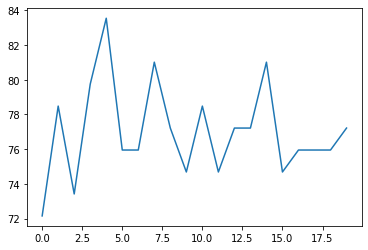

In [13]:
accuracies = []
for i in range(1,100,5):
  random_forest = RandomForestClassifier(n_estimators=i)
  random_forest.fit(X_train, y_train)
  preds = random_forest.predict(X_test)
  temp_acc = accuracy_score(y_test,preds)*100
  accuracies.append(temp_acc)
plt.plot(accuracies)

Plot the roc_curve using predict_proba a function for our random forest model, and metrics roc_curve

It might help to google these functions and look at sklearn's documentation

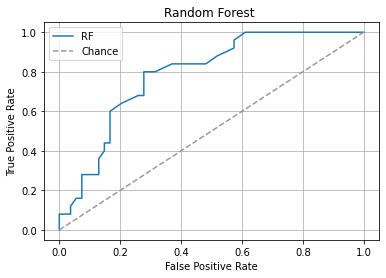

In [14]:
probs = random_forest.predict_proba(X_test)
scores = []
for prob in probs:
  prob_min = prob.argmin()  # Take min b/c its relative to 0
  prob_score = prob[prob_min]
  
  scores.append(prob_score)
 
fpr, tpr, thresh = metrics.roc_curve(y_test,scores)

# Plot results
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ')
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Chance')
plt.grid()
plt.legend()
plt.show()


To view the trees in the random_forest you can loop through your model's '.estimators_" attribute

If you have time look at pictures of the trees

In [15]:
for tr in random_forest.estimators_: 
  break

One thing to notice is the trees probably have greater depth (and smaller samples at the leafs) because they want to overfit and then average

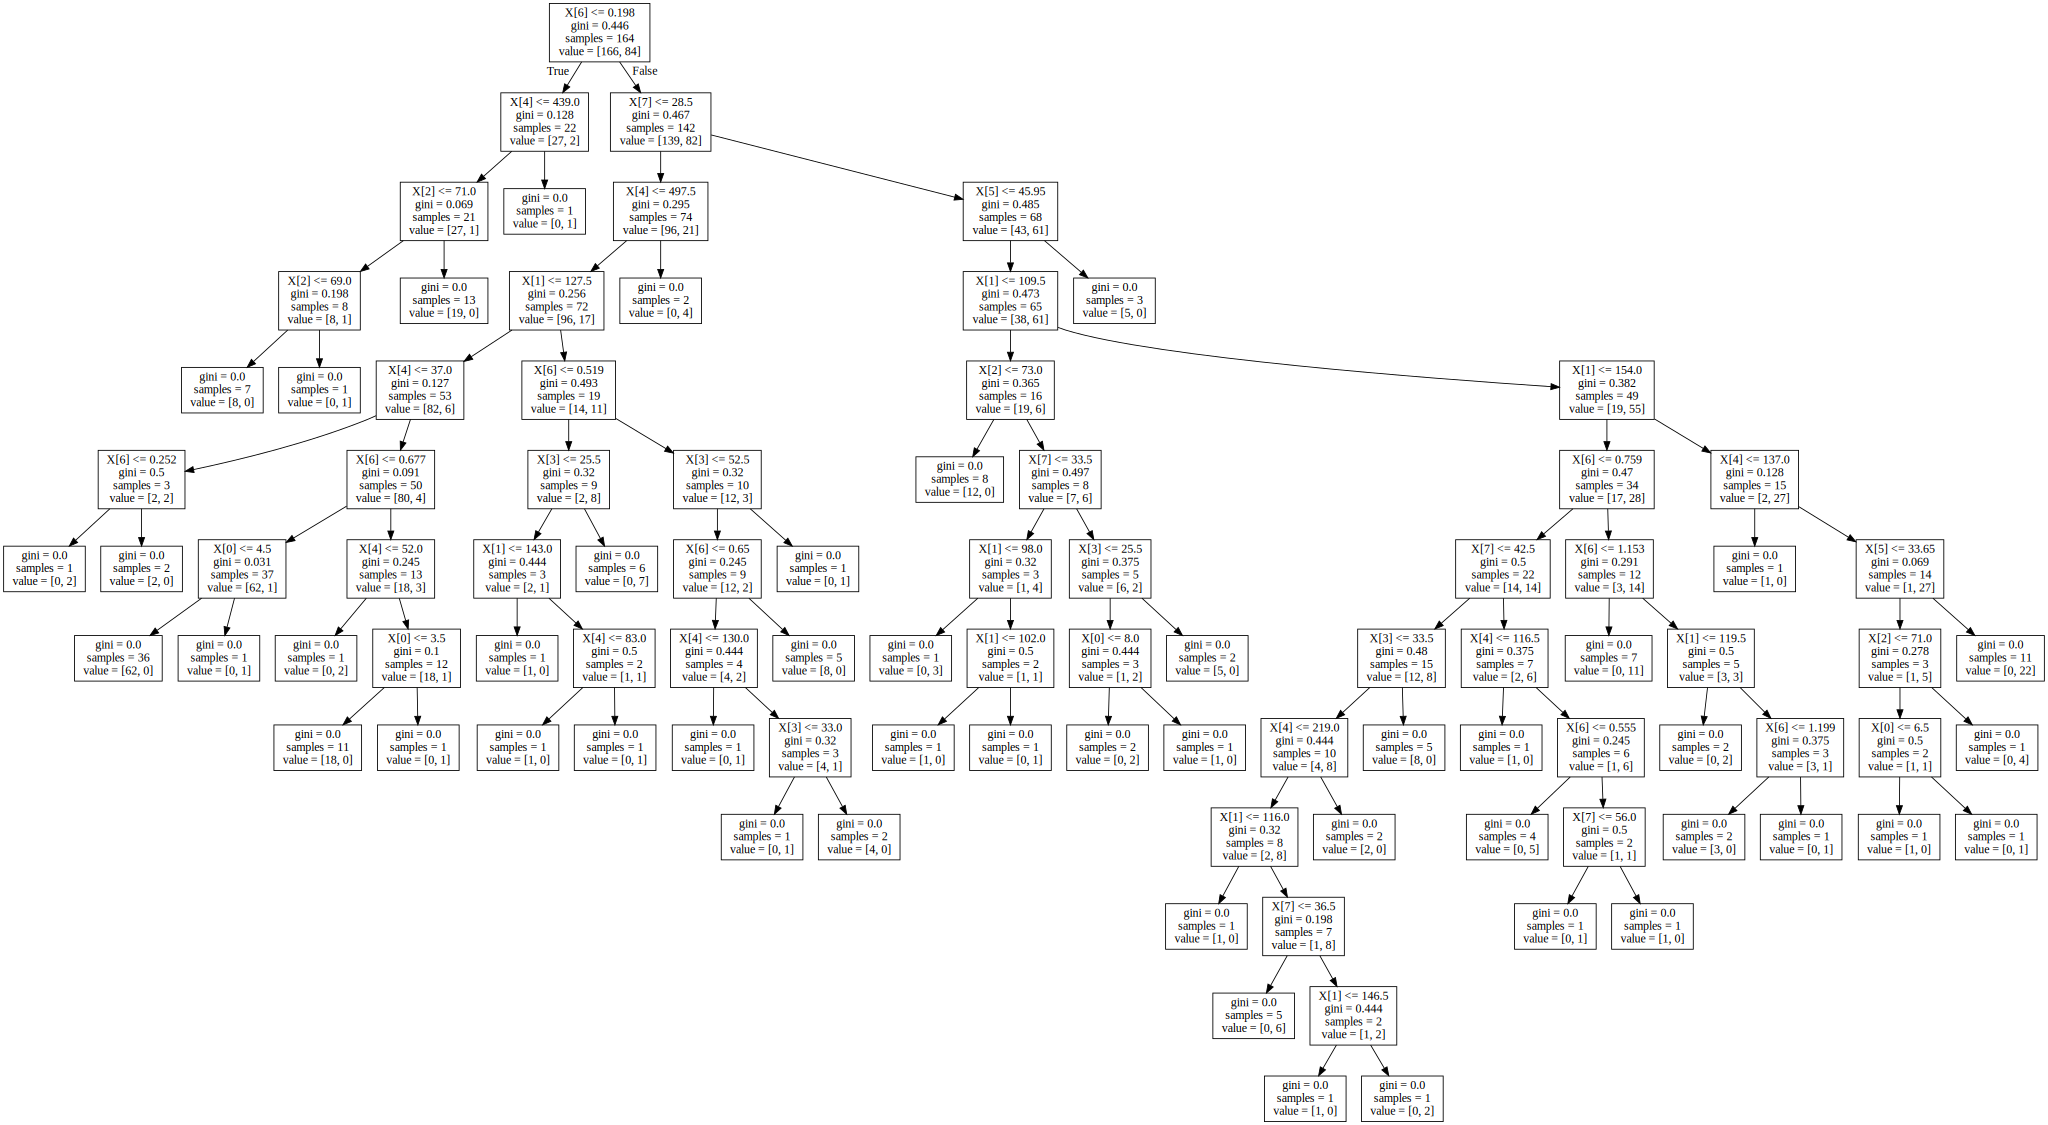

In [16]:
dot_data = tree.export_graphviz(tr, out_file=None)  
graph = graphviz.Source(dot_data)
graph